# Gradient of Probability Density Functions

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

%matplotlib inline

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


## Gaussian density function

Let's start by considering the Gaussian density and its log-probability function.

$$
f(x) = \mathcal{N}(x; \mu, \sigma) = \frac{1}{\sqrt{2\pi} \sigma} e^{- \frac{(x - \mu)^2}{2\sigma^2}}
$$

$$
g(x) = \log \mathcal{N}(x; \mu, \sigma) = - \frac{(x - \mu)^2}{2\sigma^2} - \log \sqrt{2\pi} \sigma
$$

In [2]:
mu, sigma = tf.constant(0.0, name='mu'), tf.constant(1.0, name='sigma')
normal = tf.distributions.Normal(loc=mu, scale=sigma)

x_shape = 100
x = tf.placeholder(tf.float32, shape=(x_shape,), name='x')
f = normal.prob(x, name='f')
g = normal.log_prob(x, name='g')

with tf.Session() as sess:
    x_init = np.linspace(-3.0, 3.0, x_shape)
    x, f, g = sess.run([x, f, g], feed_dict={x: x_init})

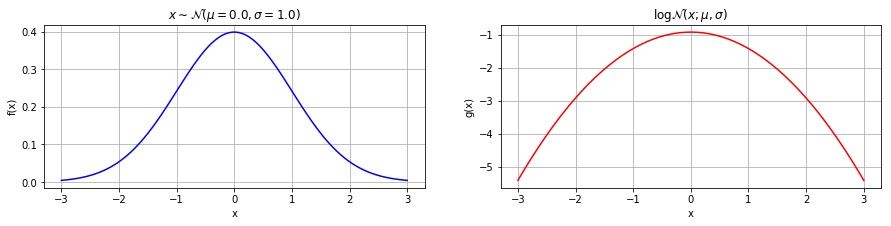

In [3]:
fig = plt.figure(figsize=(15, 3))

plt.subplot(121)
plt.plot(x, f, 'b-')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('$x \sim \mathcal{N}(\mu = 0.0, \sigma = 1.0)$')
plt.grid()

plt.subplot(122)
plt.plot(x, g, 'r-')
plt.xlabel("x")
plt.ylabel('g(x)')
plt.title('$\log \mathcal{N}(x; \mu, \sigma)$')
plt.grid()

plt.show()

## Gradient of gaussian density w.r.t. its mean

In [4]:
graph = tf.Graph()

with graph.as_default():
    mu = tf.placeholder(tf.float32, name='mu')
    sigma = tf.constant(1.0, name='sigma')
    normal = tf.distributions.Normal(loc=mu, scale=sigma)

    x = tf.placeholder(tf.float32, name='x')
    f = normal.prob(x, name='f')
    g = normal.log_prob(x, name='g')

    grad_mu, = tf.gradients(xs=mu, ys=g)

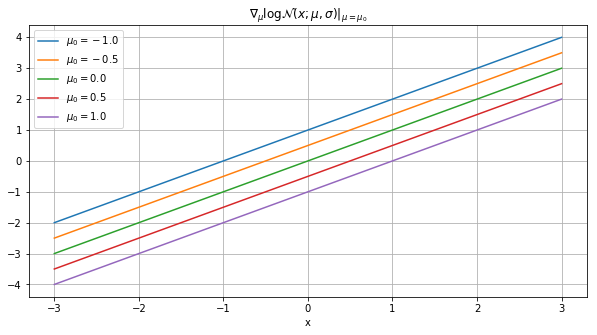

In [5]:
fig = plt.figure(figsize=(10, 5))

with tf.Session(graph=graph) as sess:

    x_shape = 100
    xs = np.linspace(-3.0, 3.0, x_shape)

    mu_shape = 5
    for mu_init in np.linspace(-1.0, 1.0, mu_shape):

        grads = []
        for x_init in xs:
            grad_mu_ = sess.run(grad_mu, feed_dict={x: x_init, mu: mu_init})
            grads.append(grad_mu_)

        plt.plot(xs, grads, label='$\\mu_0 = {}$'.format(mu_init))

    plt.title('$\\nabla_{\\mu} \log \mathcal{N}(x; \mu, \sigma) |_{\\mu = \\mu_0}$')
    plt.xlabel('x')
    plt.grid()
    plt.legend()
    plt.show()   

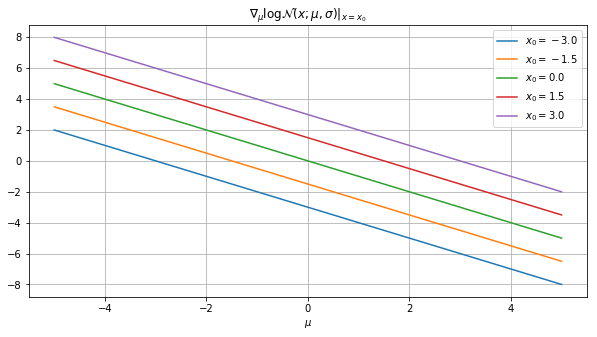

In [6]:
fig = plt.figure(figsize=(10, 5))

with tf.Session(graph=graph) as sess:

    x_shape = 5
    xs = np.linspace(-3.0, 3.0, x_shape)

    mu_shape = 100
    mus = np.linspace(-5.0, 5.0, mu_shape)

    for x_init in xs:

        grads = []
        for mu_init in mus:
            grad_mu_ = sess.run(grad_mu, feed_dict={x: x_init, mu: mu_init})
            grads.append(grad_mu_)

        plt.plot(mus, grads, label='$x_0 = {}$'.format(x_init))

    plt.title('$\\nabla_{\\mu} \log \mathcal{N}(x; \mu, \sigma) |_{x = x_0}$')
    plt.xlabel('$\\mu$')
    plt.grid()
    plt.legend()
    plt.show()   

## Gradient of gaussian density w.r.t. its std deviation

In [7]:
graph = tf.Graph()

with graph.as_default():
    mu = tf.constant(0.0, name='mu')
    sigma = tf.placeholder(tf.float32, name='sigma')
    normal = tf.distributions.Normal(loc=mu, scale=sigma)

    x = tf.placeholder(tf.float32, name='x')
    f = normal.prob(x, name='f')
    g = normal.log_prob(x, name='g')

    grad_sigma, = tf.gradients(xs=sigma, ys=g)

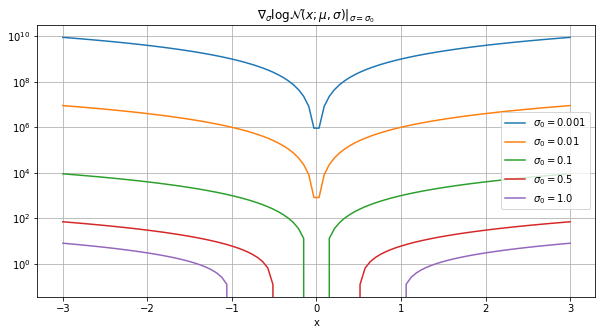

In [8]:
fig = plt.figure(figsize=(10, 5))

with tf.Session(graph=graph) as sess:

    x_shape = 100
    xs = np.linspace(-3.0, 3.0, x_shape)

    sigma_shape = 5
    sigmas = [0.001, 0.01, 0.1, 0.5, 1.0]
    for sigma_init in sigmas:

        grads = []
        for x_init in xs:
            grad_sigma_ = sess.run(grad_sigma, feed_dict={x: x_init, sigma: sigma_init})
            grads.append(grad_sigma_)

        plt.semilogy(xs, grads, label='$\\sigma_0 = {}$'.format(sigma_init))

    plt.title('$\\nabla_{\\sigma} \log \mathcal{N}(x; \mu, \sigma) |_{\\sigma = \\sigma_0}$')
    plt.xlabel('x')
    plt.grid()
    plt.legend()
    plt.show()   

/usr/local/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


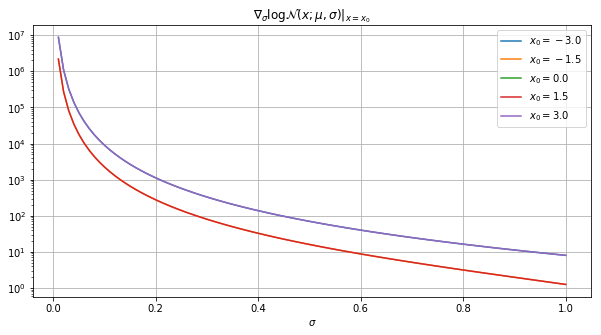

In [9]:
fig = plt.figure(figsize=(10, 5))

with tf.Session(graph=graph) as sess:

    x_shape = 5
    xs = np.linspace(-3.0, 3.0, x_shape)

    sigma_shape = 100
    sigmas = np.linspace(0.0, 1.0, sigma_shape)

    for x_init in xs:

        grads = []
        for sigma_init in sigmas:
            grad_sigma_ = sess.run(grad_sigma, feed_dict={x: x_init, sigma: sigma_init})
            grads.append(grad_sigma_)

        plt.semilogy(sigmas, grads, label='$x_0 = {}$'.format(x_init))

    plt.title('$\\nabla_{\\sigma} \log \mathcal{N}(x; \mu, \sigma) |_{x = x_0}$')
    plt.xlabel('$\\sigma$')
    plt.grid()
    plt.legend()
    plt.show()